# Part I - Prosper Loans Dataset Exploration
## by Sarah Lorenzen

## Introduction

Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. In almost 20 years, Prosper has facilitated more than $28 billion in loans to over 2 million people. 

**Reference:** (https://www.prosper.com/)

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# commands to help data visualization in Jupyter Notebook
pd.set_option('display.max_columns', None) # do not collapse columns when viewing data
import warnings
warnings.filterwarnings("ignore") # red warnings are turned off

In [2]:
# Load Prosper Loans dataset

df_loans = pd.read_csv('prosperLoanData.csv')
df_loans.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

### What is the structure of your dataset?

**Type:** Tabular data in CSV format
**Shape:** 113,937 rows × 81 columns

In [3]:
df_loans.shape

(113937, 81)

### What is/are the main feature(s) of interest in your dataset?

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. 

**Reference:** Udacity Choose Your Dataset (https://learn.udacity.com/nanodegrees/nd002/parts/cd12532/lessons/f280801a-c295-46aa-b1b4-e0491b8a33aa/concepts/7b169fa3-0b72-4ec8-9344-fe2260338f1e)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will be using the following columns from the dataset (listed with their significance): 

Variable | Description |
:----------- | :----------- |
ListingKey | Unique key for each listing, same value as the 'key' used in the listing object in the API.
Term | The length of the loan expressed in months.
LoanStatus | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
BorrowerRate | The Borrower's interest rate for this loan.
ProsperScore | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
ListingCategory (numeric) |  The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
CreditScoreRangeLower | The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
CreditScoreRangeUpper | The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
DebtToIncomeRatio | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
IncomeRange | The income range of the borrower at the time the listing was created.
LoanOriginalAmount | The origination amount of the loan.
MonthlyLoanPayment | The scheduled monthly loan payment.

Supporting features are the additional loan characteristics I selected above - they provide additional details about the loan and the Borrowers qualifications.

**Reference:** Prosper Loan Data - Variable Definitions File provided by Udacity

### Reload dataset with pertinent data columns

In [4]:
# Defining the columns to read - exclude the rest to load dataset faster & save parsing time
# load csv file data into dataframe

usecols = ["ListingKey", "Term", "LoanStatus", "BorrowerRate", "ProsperScore", "ListingCategory (numeric)", "BorrowerState", "CreditScoreRangeLower", "CreditScoreRangeUpper", "DebtToIncomeRatio", "IncomeRange", "LoanOriginalAmount", "MonthlyLoanPayment"]
df_loans = pd.read_csv('prosperLoanData.csv', usecols=usecols)

df_loans.head(5)

,ListingKey,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment
0,1021339766868145413AB3B,36,Completed,0.1580,NaN,0,CO,640.0,659.0,0.17,"$25,000-49,999",9425,330.43
1,10273602499503308B223C1,36,Current,0.0920,7.0,2,CO,680.0,699.0,0.18,"$50,000-74,999",10000,318.93
2,0EE9337825851032864889A,36,Completed,0.2750,NaN,0,GA,480.0,499.0,0.06,Not displayed,3001,123.32
3,0EF5356002482715299901A,36,Current,0.0974,9.0,16,GA,800.0,819.0,0.15,"$25,000-49,999",10000,321.45
4,0F023589499656230C5E3E2,36,Current,0.2085,4.0,2,MN,680.0,699.0,0.26,"$100,000+",15000,563.97


### Data Cleaning

In [5]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   BorrowerState              108422 non-null  object 
 7   CreditScoreRangeLower      113346 non-null  float64
 8   CreditScoreRangeUpper      113346 non-null  float64
 9   DebtToIncomeRatio          105383 non-null  float64
 10  IncomeRange                113937 non-null  object 
 11  LoanOriginalAmount         113937 non-null  int64  
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: float64(6), int64(3), obje

#### Good Dataframe Hygeine: Make a copy of the dataframe

In [6]:
# Make a copy of the dataset to ensure the raw dataframes are not impacted

loans_dirty = df_loans.copy()

In [7]:
# check for duplicated rows
loans_dirty.duplicated().sum()

0

No duplicate rows.

In [8]:
# Check for Missing values
loans_dirty.isnull().sum()

ListingKey                       0
Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
DebtToIncomeRatio             8554
IncomeRange                      0
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

Prosper Score has 29,000 out of 113,937 rows that are missing data. Looking at the Data Dictionary, we are reminded that ProsperScore was not used until after July 2009. Borrower State, CreditScoreRangeLower, CreditScoreRangeUpper, and DebtToIncomeRatio, all need to have the null values dropped.

In [9]:
# Fill the null values with zero.
loans_dirty.fillna(0, inplace = True)

# verify no remaining null values
loans_dirty.isnull().sum()

ListingKey                   0
Term                         0
LoanStatus                   0
BorrowerRate                 0
ProsperScore                 0
ListingCategory (numeric)    0
BorrowerState                0
CreditScoreRangeLower        0
CreditScoreRangeUpper        0
DebtToIncomeRatio            0
IncomeRange                  0
LoanOriginalAmount           0
MonthlyLoanPayment           0
dtype: int64

In [10]:
loans_dirty['ProsperScore'] = loans_dirty['ProsperScore'].replace(0, np.NaN)
loans_dirty['BorrowerState'] = loans_dirty['BorrowerState'].replace(0, np.NaN)
loans_dirty['CreditScoreRangeLower'] = loans_dirty['CreditScoreRangeLower'].replace(0, np.NaN)
loans_dirty['CreditScoreRangeUpper'] = loans_dirty['CreditScoreRangeUpper'].replace(0, np.NaN)
loans_dirty['DebtToIncomeRatio'] = loans_dirty['DebtToIncomeRatio'].replace(0, np.NaN)

loans_dirty.dropna(inplace =True)

Drop the rows that originally had missing content. We don't want our graphs and dataset to have skewed results.

In [11]:
loans_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77551 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 77551 non-null  object 
 1   Term                       77551 non-null  int64  
 2   LoanStatus                 77551 non-null  object 
 3   BorrowerRate               77551 non-null  float64
 4   ProsperScore               77551 non-null  float64
 5   ListingCategory (numeric)  77551 non-null  int64  
 6   BorrowerState              77551 non-null  object 
 7   CreditScoreRangeLower      77551 non-null  float64
 8   CreditScoreRangeUpper      77551 non-null  float64
 9   DebtToIncomeRatio          77551 non-null  float64
 10  IncomeRange                77551 non-null  object 
 11  LoanOriginalAmount         77551 non-null  int64  
 12  MonthlyLoanPayment         77551 non-null  float64
dtypes: float64(6), int64(3), object(4)
memory usage: 8

Data types apropriately match their values. 

In [12]:
loans_dirty.shape

(77551, 13)

#### New dataset structure

**Type:** Tabular data in CSV format  
**Shape:** 77,551 rows × 13 columns

In [13]:
# Set ListingKey as index
loans_dirty.set_index('ListingKey', inplace=True)

In [14]:
loans_dirty.IncomeRange.value_counts()

IncomeRange
$50,000-74,999    24030
$25,000-49,999    22023
$100,000+         14013
$75,000-99,999    13644
$1-24,999          3840
Not employed          1
Name: count, dtype: int64

In [15]:
loans_dirty.describe()

,Term,BorrowerRate,ProsperScore,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment
count,77551.000000,77551.000000,77551.000000,77551.000000,77551.000000,77551.000000,77551.000000,77551.000000,77551.000000
mean,42.724555,0.193407,6.061959,3.284767,699.000658,718.000658,0.258772,9269.760570,295.766419
std,11.712218,0.073898,2.362394,4.385477,47.161677,47.161677,0.318331,6398.403701,189.328517
min,12.000000,0.040000,1.000000,0.000000,600.000000,619.000000,0.010000,1000.000000,0.000000
25%,36.000000,0.134900,4.000000,1.000000,660.000000,679.000000,0.150000,4000.000000,158.490000
50%,36.000000,0.184500,6.000000,1.000000,700.000000,719.000000,0.220000,8000.000000,256.390000
75%,60.000000,0.252400,8.000000,3.000000,720.000000,739.000000,0.320000,14500.000000,392.280000
max,60.000000,0.360000,11.000000,20.000000,880.000000,899.000000,10.010000,35000.000000,2251.510000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [16]:
# Barcharts - Qualitative [Ordinal or Nominal(re-sort)]
# Histograms - Quantitative

In [17]:
loans_dirty.head(5)

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory (numeric),BorrowerState,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment
ListingKey,,,,,,,,,,,,
10273602499503308B223C1,36,Current,0.0920,7.0,2,CO,680.0,699.0,0.18,"$50,000-74,999",10000,318.93
0EF5356002482715299901A,36,Current,0.0974,9.0,16,GA,800.0,819.0,0.15,"$25,000-49,999",10000,321.45
0F023589499656230C5E3E2,36,Current,0.2085,4.0,2,MN,680.0,699.0,0.26,"$100,000+",15000,563.97
0F05359734824199381F61D,60,Current,0.1314,10.0,1,NM,740.0,759.0,0.36,"$100,000+",15000,342.37
0F0A3576754255009D63151,36,Current,0.2712,2.0,1,KS,680.0,699.0,0.27,"$25,000-49,999",3000,122.67


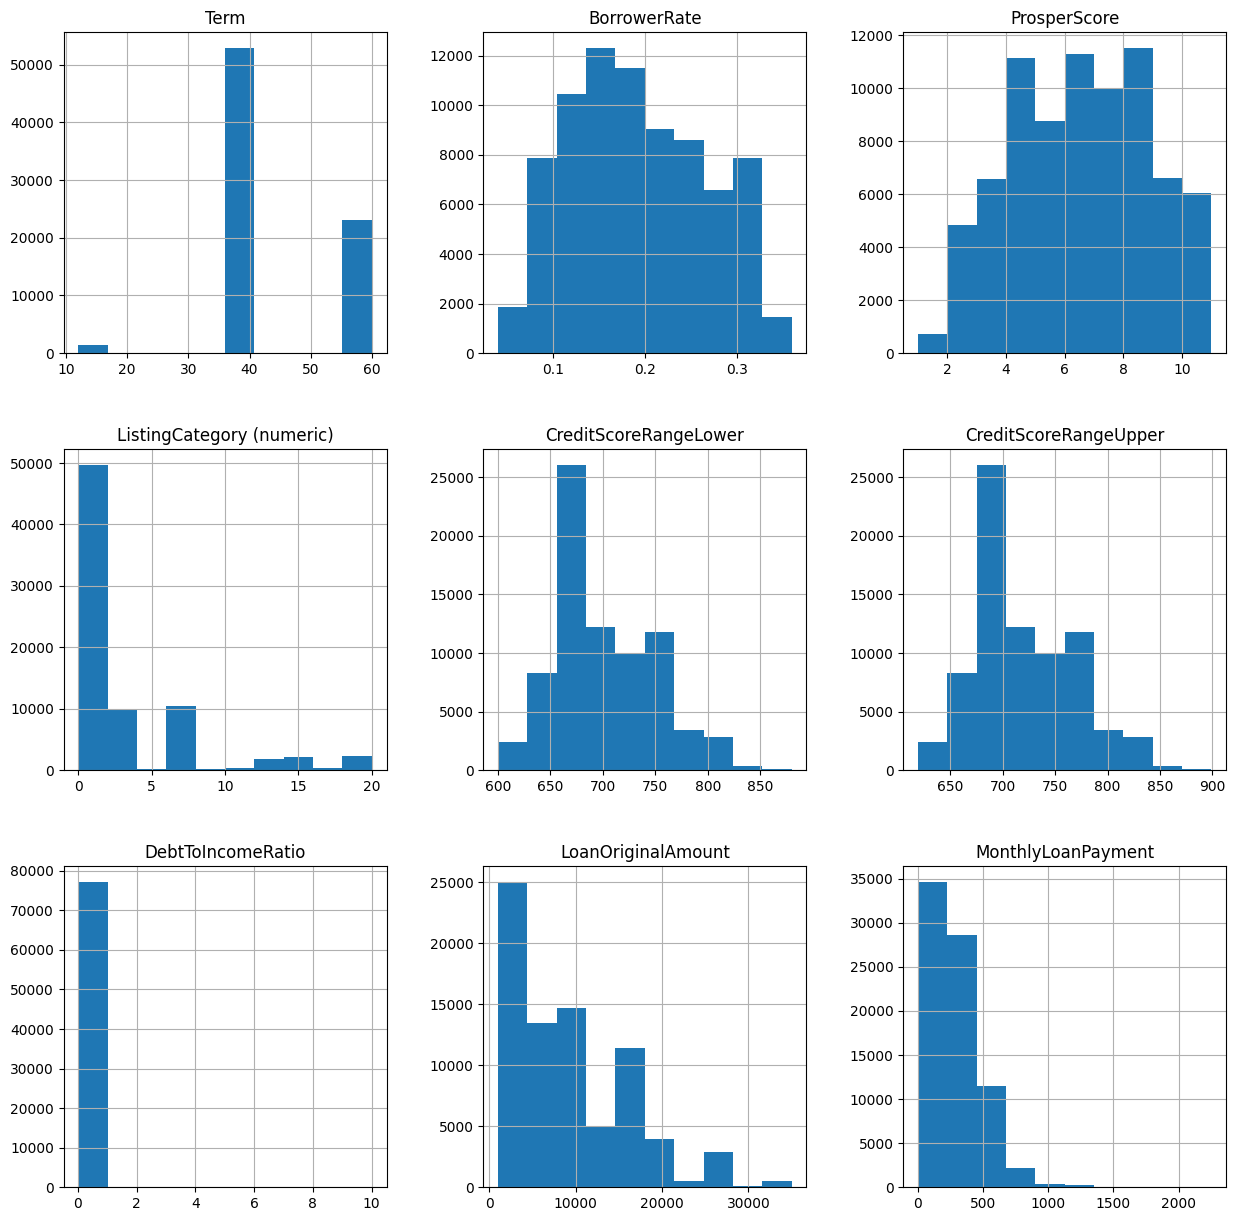

In [18]:
# Histogram Charts Overview from Matplotlib.org code

loans_dirty.hist(['Term', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'CreditScoreRangeLower',\
         'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment'],\
        figsize=(15,15));

LoanOriginalAmount, MonthlyLoanPayment, DebtToIncomeRatio are skewed and will require transformation.

**Reference:** 
The histogram (hist) function with multiple data sets (https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html)

### Term

**Question from the data:** What is the most common Loan Term for Prosper Peer loans?

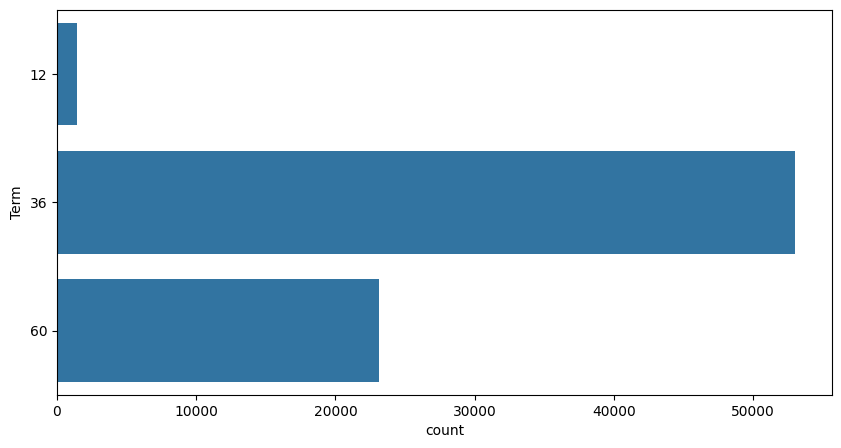

In [19]:
plt.figure(figsize=[10, 5])
sns.countplot(data = loans_dirty, y = 'Term');

The most prevalent loan term is 36 months.

### BorrowerRate

**Question from the data:** What are the typical Loan Rates for Prosper loans? High? Low? Predatory?

In [20]:
loans_dirty['BorrowerRate'].describe()

count    77551.000000
mean         0.193407
std          0.073898
min          0.040000
25%          0.134900
50%          0.184500
75%          0.252400
max          0.360000
Name: BorrowerRate, dtype: float64

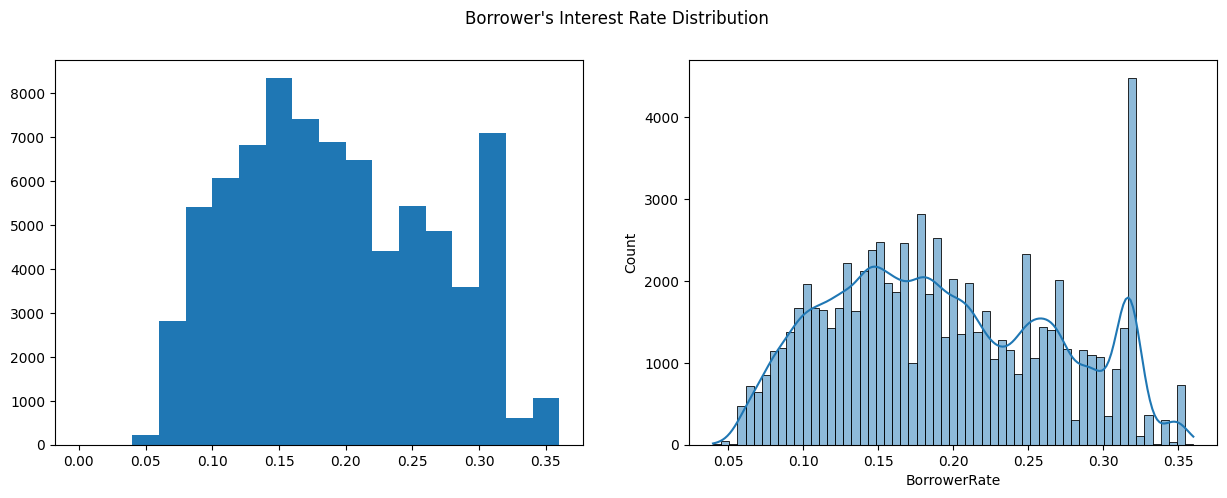

In [21]:
plt.figure(figsize=(15,5))
plt.suptitle("Borrower's Interest Rate Distribution")
plt.subplot(1,2,1)
bins = np.arange(0, loans_dirty.BorrowerRate.max()+0.02, 0.02)
plt.hist(data = loans_dirty, x = 'BorrowerRate', bins = bins)

plt.subplot(1,2,2)
sns.histplot(loans_dirty['BorrowerRate'], kde=True);

Out of 77,551 loans (total after cleaning dataset), 25% have a BorrowerRate at or above 25%, maxing out at 36%!!

36% is considered a Predatory Loan Rate by the State-Level Usury Laws for many states - needs further investigation.

**Reference:** State Usury Laws (https://www.bankrate.com/credit-cards/zero-interest/does-law-cap-credit-card-interest-rates/)

### ProsperScore

**Question from the data:** Does Prosper loans only lend to the strongest applicants or a wide range?

In [22]:
# Total Counts for Top 10 ProsperScore values
loans_dirty.ProsperScore.value_counts().nlargest(10)

ProsperScore
8.0     11542
6.0     11308
4.0     11163
7.0      9966
5.0      8774
9.0      6624
3.0      6580
2.0      4822
10.0     4639
11.0     1412
Name: count, dtype: int64

In [23]:
# Quartile distribution of ProsperScores
loans_dirty.ProsperScore.describe()

count    77551.000000
mean         6.061959
std          2.362394
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

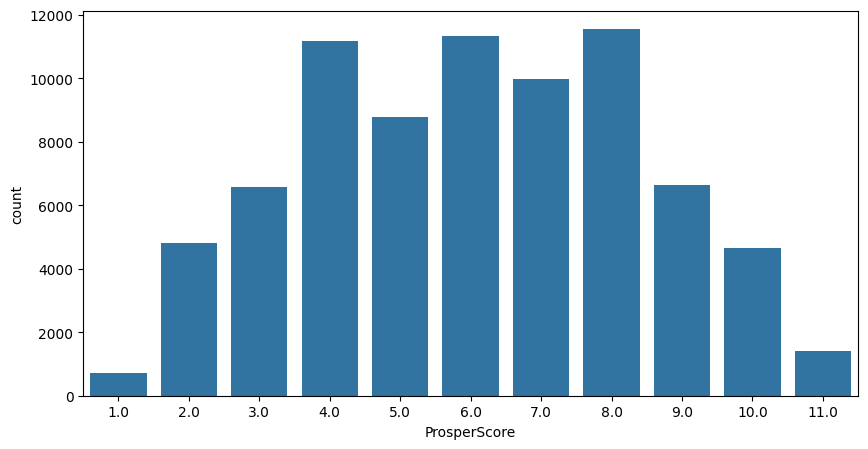

In [24]:
plt.figure(figsize=[10, 5])
sns.countplot(data = loans_dirty, x = 'ProsperScore');


**ProsperScore** is a custom risk score built using historical Prosper data. The score ranges from 1-11, with 10+ being the best, or lowest risk scores.

50% of the loans fall in the range 4 to 8. This indicates a low to medium tolerance for risk on the part of Prosper Peer Lenders and lending to a wide range of applicants.

### ListingCategory (numeric)

**Question from the data:** What are the most common Loan Categories for Prosper loans?

In [25]:
# Rename Listing Category column
loans_dirty.rename(columns={'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

In [26]:
# Confirm change
loans_dirty.head(1)

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory,BorrowerState,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment
ListingKey,,,,,,,,,,,,
10273602499503308B223C1,36,Current,0.092,7.0,2,CO,680.0,699.0,0.18,"$50,000-74,999",10000,318.93


The dictionary for Listing Categories:
Key | Loan Use
:---- | :----
0 | Not Available
1 | Debt Consolidation
2 | Home Improvement
3 | Business
4 | Personal Loan
5 | Student Use
6 | Auto
7 | Other
8 | Baby&Adoption
9 | Boat
10 | Cosmetic Procedure
11 | Engagement Ring
12 | Green Loans
13 | Household Expenses
14 | Large Purchases
15 | Medical/Dental
16 | Motorcycle
17 | RV
18 | Taxes
19 | Vacation
20 | Wedding Loans

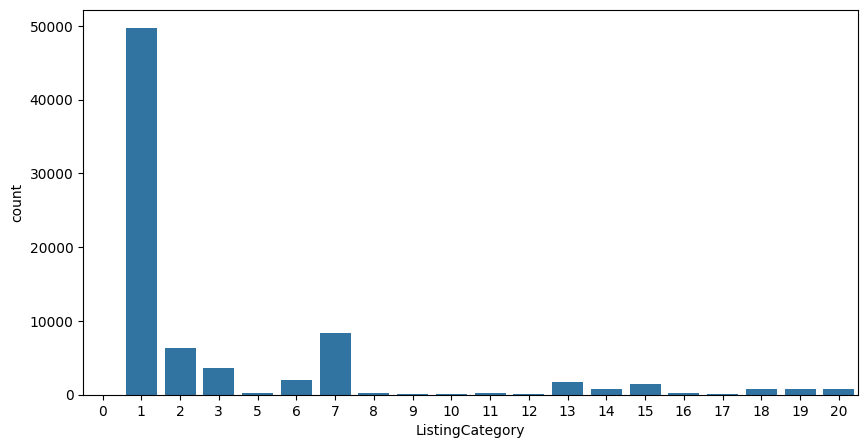

In [27]:
plt.figure(figsize=[10, 5])
sns.countplot(data = loans_dirty, x = 'ListingCategory');

The majority of Prosper's loans are underwritten for Debt Consolidation. Will this category have a higher default rate?

### CreditScoreRangeLower & CreditScoreRangeUpper

**Question from the data:** What is the typical Credit Score profile for approved Prosper loans?

In [28]:
# Get Quartile percentages of Credit Score distribution
loans_dirty[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,77551.000000,77551.000000
mean,699.000658,718.000658
std,47.161677,47.161677
min,600.000000,619.000000
25%,660.000000,679.000000
50%,700.000000,719.000000
75%,720.000000,739.000000
max,880.000000,899.000000


(600.0, 900.0)

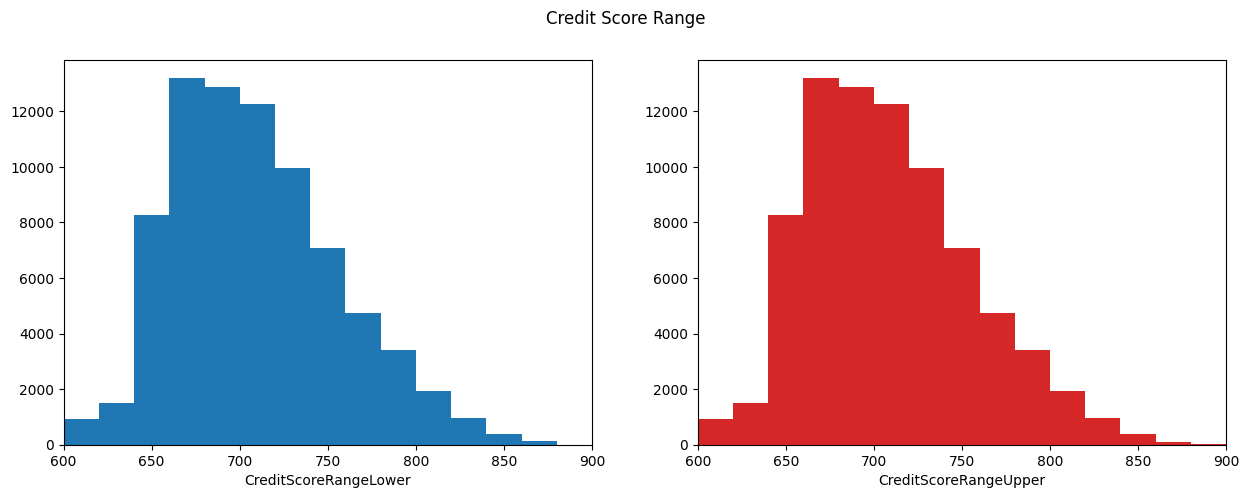

In [29]:
plt.figure(figsize=(15,5))
plt.suptitle("Credit Score Range")

plt.subplot(1,2,1)
bins_lower = np.arange(0, loans_dirty.CreditScoreRangeLower.max()+20, 20)
plt.hist(data = loans_dirty, x = 'CreditScoreRangeLower', bins = bins_lower)
plt.xlabel('CreditScoreRangeLower')
plt.xlim(600, 900)

plt.subplot(1,2,2)
bins_upper = np.arange(0, loans_dirty.CreditScoreRangeUpper.max()+20, 20)
plt.hist(data = loans_dirty, x = 'CreditScoreRangeUpper', bins = bins_upper, color ='tab:red')
plt.xlabel('CreditScoreRangeUpper');
plt.xlim(600, 900)

The Lower and Upper ranges are almost identical. 

In [30]:
loans_dirty.groupby(['CreditScoreRangeLower', 'CreditScoreRangeUpper'])['Term'].count()

CreditScoreRangeLower  CreditScoreRangeUpper
600.0                  619.0                      937
620.0                  639.0                     1484
640.0                  659.0                     8272
660.0                  679.0                    13195
680.0                  699.0                    12879
700.0                  719.0                    12260
720.0                  739.0                     9955
740.0                  759.0                     7071
760.0                  779.0                     4729
780.0                  799.0                     3396
800.0                  819.0                     1917
820.0                  839.0                      957
840.0                  859.0                      371
860.0                  879.0                      113
880.0                  899.0                       15
Name: Term, dtype: int64

The majority of the loans fall within range of 660 - 740

The ranges Lower and Upper ranges are only 20 points apart. Since each shows near identical information, we will drop the CreditScoreRangeUpper column.

In [31]:
loans_dirty.drop('CreditScoreRangeUpper', axis = 1, inplace = True)

In [32]:
# Confirm CreditScoreRangeUpper is dropped
loans_dirty.head(1)

,Term,LoanStatus,BorrowerRate,ProsperScore,ListingCategory,BorrowerState,CreditScoreRangeLower,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment
ListingKey,,,,,,,,,,,
10273602499503308B223C1,36,Current,0.092,7.0,2,CO,680.0,0.18,"$50,000-74,999",10000,318.93


### DebtToIncomeRatio

**Question from the data:** How much Debt to Income to borrowers have that were approved for Prosper loans?

In [33]:
# Get Quartile percentages of Debt To Income Ratio distribution
loans_dirty.DebtToIncomeRatio.describe()

count    77551.000000
mean         0.258772
std          0.318331
min          0.010000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

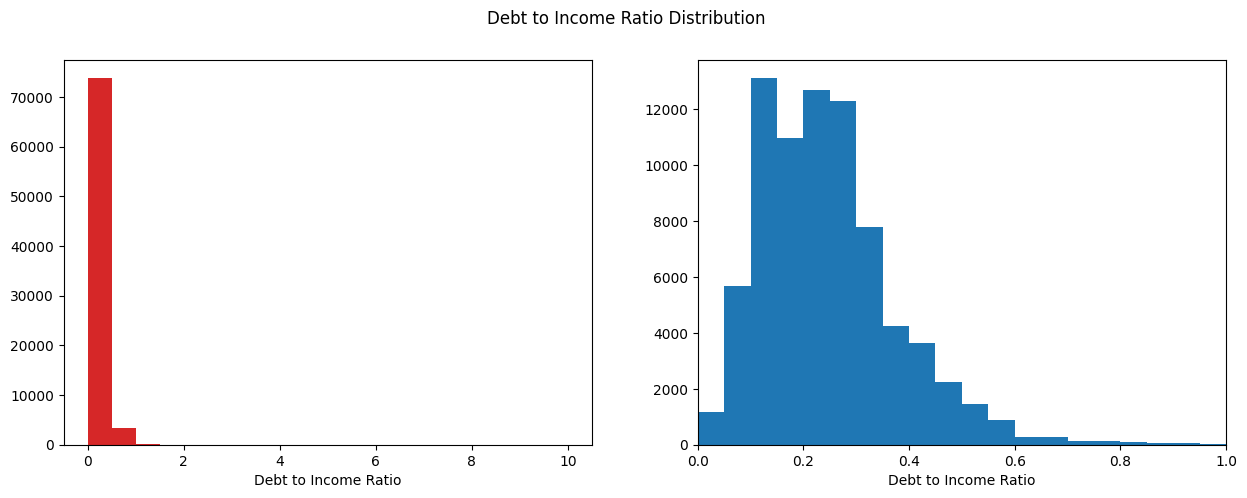

In [34]:
plt.figure(figsize=(15,5))
plt.suptitle('Debt to Income Ratio Distribution')
plt.subplot(1,2,1)
bins = np.arange(0, 10.5, 0.5)
plt.hist(data = loans_dirty, x = 'DebtToIncomeRatio', bins = bins, color = 'tab:red')
plt.xlabel('Debt to Income Ratio')

plt.subplot(1,2,2)
bins = np.arange(0, 2.05, 0.05)
plt.hist(data = loans_dirty, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim((0, 1))
plt.xlabel('Debt to Income Ratio');

Debt to Income Ratio is positively skewed. Let's investigate the log version to delve deeper.

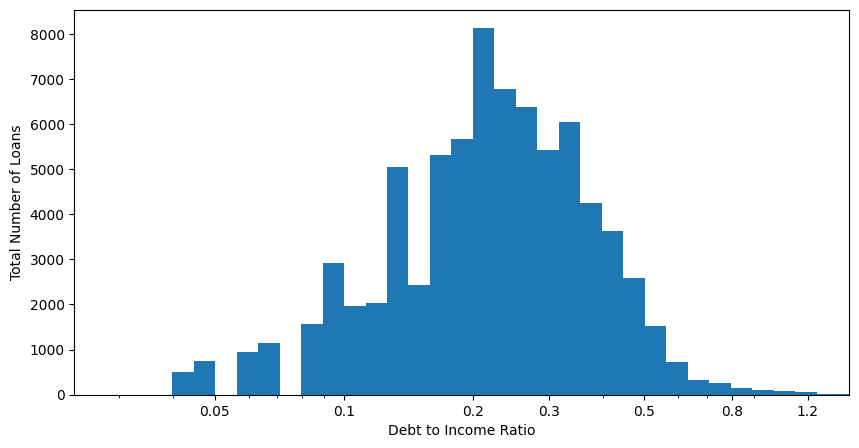

In [35]:
log_binsize = 0.05
bins = 10 ** np.arange(-1.5, np.log10(loans_dirty['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_dirty, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2], [0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2])
plt.xlim((0, 1.5))
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Total Number of Loans')
plt.show()

The log version does show a wider view of the Debt to Income Ratio distribution. 

The majority fall within the range 0.15 to 0.40

### LoanOriginalAmount

**Question from the data:** What are the most common Original Loan Amounts for Prosper loans?

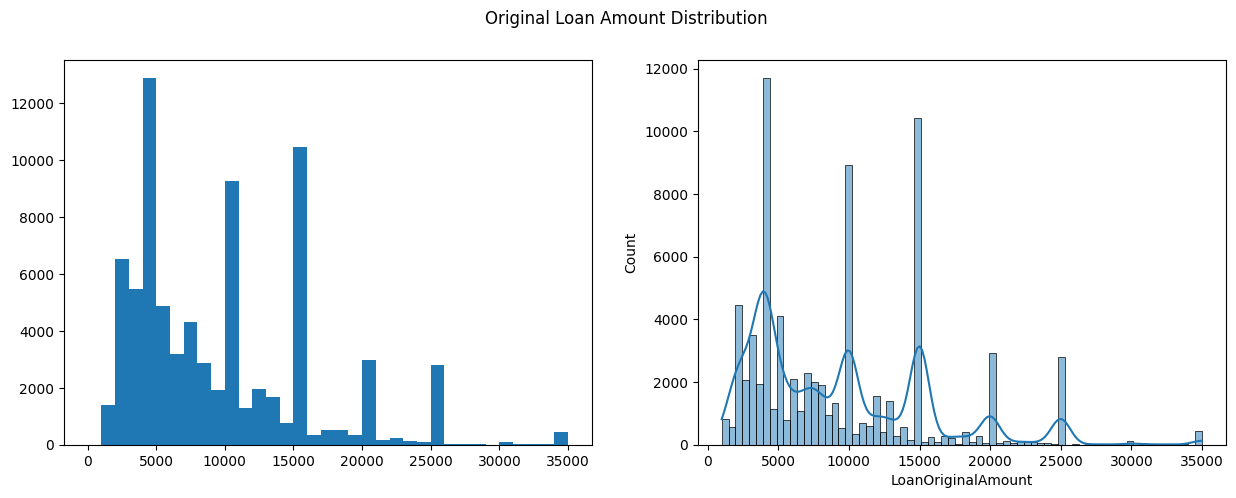

In [36]:
plt.figure(figsize=(15,5))
plt.suptitle('Original Loan Amount Distribution')
plt.subplot(1,2,1)
bins = np.arange(0, loans_dirty['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loans_dirty, x = 'LoanOriginalAmount', bins = bins)

plt.subplot(1,2,2)
sns.histplot(loans_dirty["LoanOriginalAmount"], kde=True);

In [37]:
np.sort(loans_dirty.LoanOriginalAmount.value_counts().nlargest(6).index)

array([ 2000,  3000,  4000,  5000, 10000, 15000])

In [38]:
loans_dirty.LoanOriginalAmount.value_counts().nlargest(6)

LoanOriginalAmount
4000     11487
15000    10350
10000     8821
2000      4124
5000      3890
3000      3129
Name: count, dtype: int64

Loan amounts are positively skewed with the largest amounts being at $4,000  and  $15,000. The majority of the loan amounts are concentrated on the lower end of the range.

### MonthlyLoanPayment

**Question from the data:** What are the most common Monthly Loan Payments for Prosper loans?

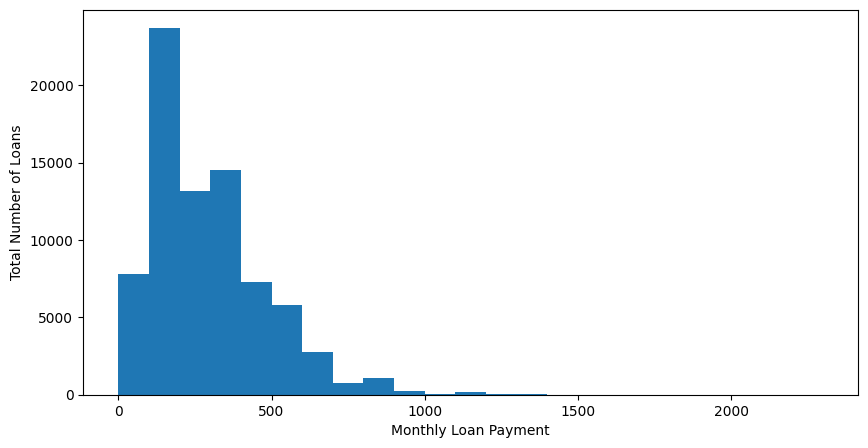

In [39]:
bins = np.arange(0, loans_dirty['MonthlyLoanPayment'].max()+100, 100)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_dirty, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Total Number of Loans');

Monthly payment distribution is positively skewed and has a long tail. Log scale might tell us more.

In [40]:
# Get the Quartile percentage distributions of Monthly Loan payments
loans_dirty.MonthlyLoanPayment.describe()

count    77551.000000
mean       295.766419
std        189.328517
min          0.000000
25%        158.490000
50%        256.390000
75%        392.280000
max       2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [41]:
# 5 Most Frequently occuring loan payment amounts
loans_dirty.MonthlyLoanPayment.value_counts().nlargest(5)

MonthlyLoanPayment
173.71    1929
172.76     482
0.00       443
86.85      399
174.20     351
Name: count, dtype: int64

We've determined some xtick points, 85 as that's a nearby integer from 86.85, and 173 since it's in between 173.71 and 172.76.

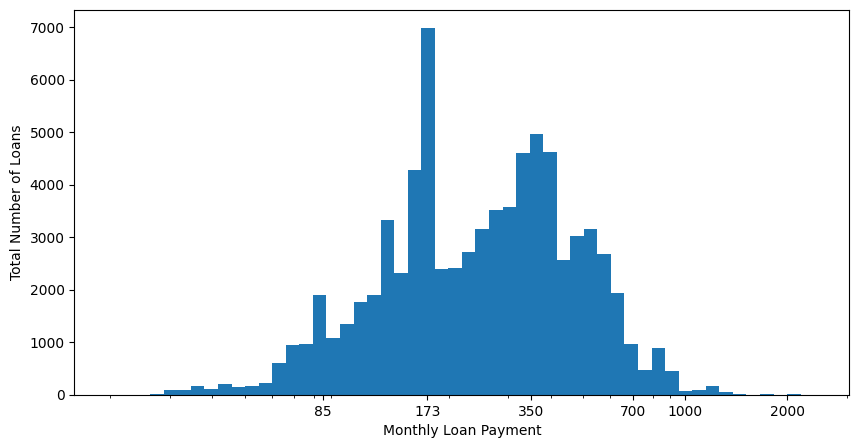

In [42]:
log_binsize = 0.04
bins = 10 ** np.arange(1.3, np.log10(loans_dirty['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loans_dirty, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Total Number of Loans')
plt.xticks([85, 173, 350, 700, 1000, 2000], [85, 173, 350, 700, 1000, 2000])
plt.show()

The most popular loan payment value of 173 is clearly visible, will need to investigate further the cause.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

**The majority of the loans had an original loan amount of either $4,000 or $15,000** Loan original amount is multimodal. 

**The most common monthly payment was $173/month** This is a very cheap loan payment - I expected higher.

**36 month term** is the most prevalent

**Debt Consolidation Loans** are the most common loan category. Will investigate the default status for this category.

**25% + Interest Rate loans!** Out of 77,551 loans, 25% have a BorrowerRate of 25% or higher, maxing out at 36%!

**660-740 Credit Score range** The majority of the loans fall within a credit score range of 660 - 740

**15-40% Debt to Income Ratio** for the majority of the loans - supports the Debt Consolidation category being the top, also points to the Medium risk-tolerance of the peer lenders.

**ProsperScore 4-8** covers 50% of all loans. With 10 being the best possible ProsperScore, this definitely higlights the Medium risk-tolerance of the peer lenders.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I delved deeper into positively right skewed variables using a logarithmic scale to get a clearer picture of where the bulk of the data points lie.

Tidying operations performed: 

1. Renaming Columns to make column names more readable. 
2. Dropping Missing/Null Values or Irrelevant Data rows or columns with too many missing values.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

In [43]:
# Scatterplots - Quantitative vs Quantitative & Pearson Correlation Coefficient 'r'
# Box Plots - Quantitative vs Qualitative data
# Heat Map - Finding Correlations

In [44]:
# Repeated to make the Heatmap statement easier to write
loans_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77551 entries, 10273602499503308B223C1 to E6ED3600409833199F711B7
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   77551 non-null  int64  
 1   LoanStatus             77551 non-null  object 
 2   BorrowerRate           77551 non-null  float64
 3   ProsperScore           77551 non-null  float64
 4   ListingCategory        77551 non-null  int64  
 5   BorrowerState          77551 non-null  object 
 6   CreditScoreRangeLower  77551 non-null  float64
 7   DebtToIncomeRatio      77551 non-null  float64
 8   IncomeRange            77551 non-null  object 
 9   LoanOriginalAmount     77551 non-null  int64  
 10  MonthlyLoanPayment     77551 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 9.1+ MB


### Find Correlations

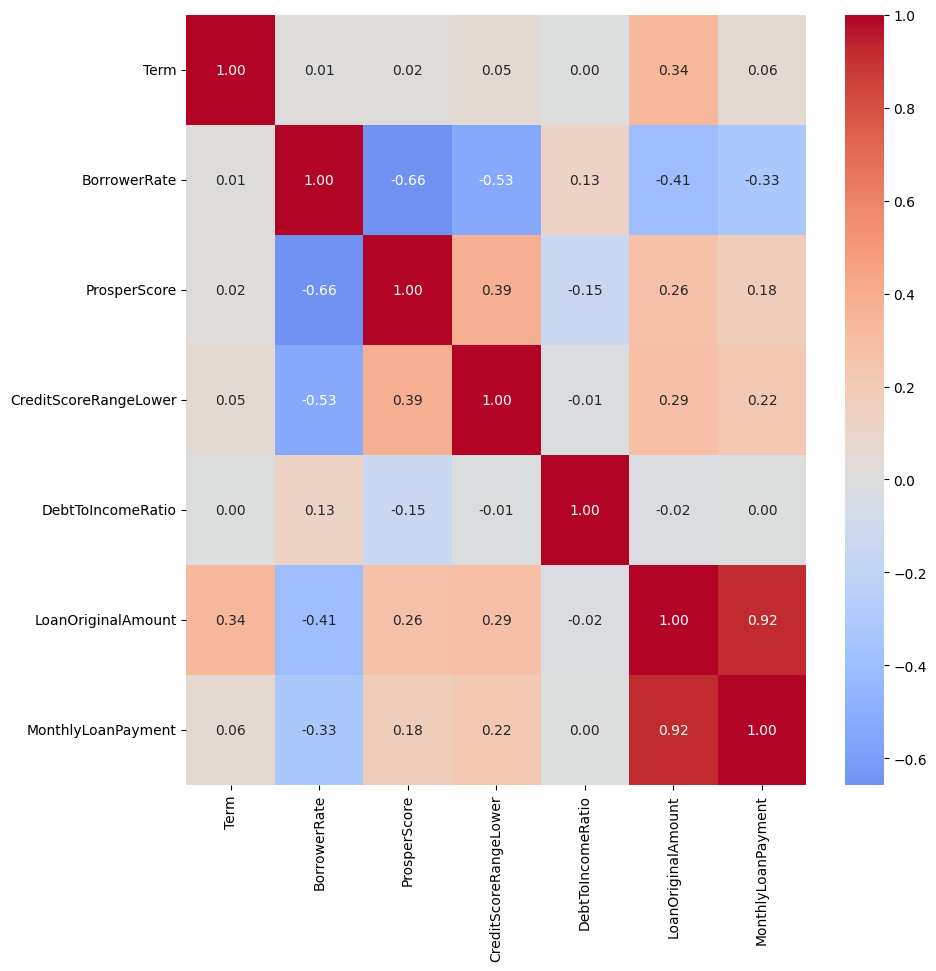

In [45]:
# Heatmap 01
plt.figure(figsize = [10, 10])
sns.heatmap(loans_dirty[['Term', 'BorrowerRate', 'ProsperScore', 'CreditScoreRangeLower',\
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment']]\
           .corr(), annot = True, fmt = '.2f',
           cmap = 'coolwarm', center = 0)
plt.show()

**References:** 

Seaborn Heatmaps - (https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Seaborn Color palettes - (https://seaborn.pydata.org/tutorial/color_palettes.html)

Based on the correlations observed in the Heatmap, we will look into:

- BorrowerRate vs LoanOriginalAmount
- BorrowerRate vs MonthlyLoanPayment
- BorrowerRate vs CreditScoreRangeLower
- BorrowerRate vs ProsperScore
- LoanOriginalAmount vs MonthlyLoanPayment
- LoanOriginalAmount vs CreditScoreRangeLower

In [46]:
# Random sample of 5000 from the dataset to avoid Overplot
sample = np.random.choice(loans_dirty.shape[0], 5000, replace = False)
loans_samp = loans_dirty.iloc[sample,:]

### BorrowerRate vs LoanOrginalAmount

**Question from the data:** Does BorrowerRate affect Loan Amount?

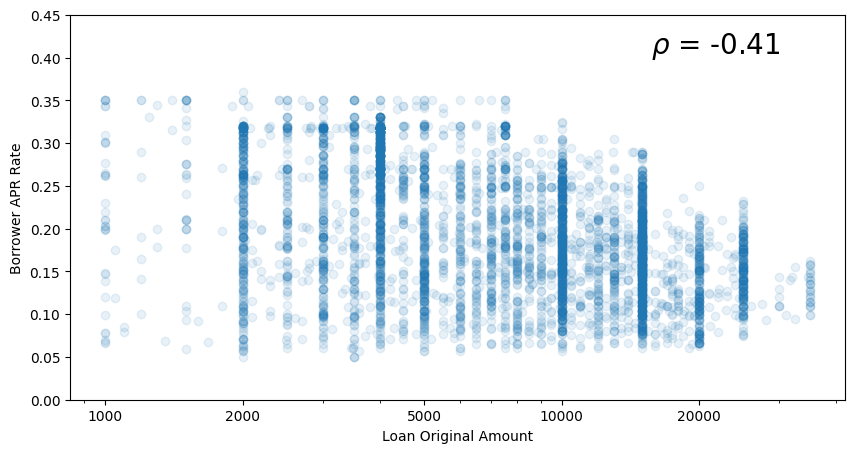

In [47]:
# Scatterplot 01
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='LoanOriginalAmount', y='BorrowerRate', alpha = 1/10)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR Rate')

plt.xscale('log')
plt.ylim((0,0.45))
plt.xticks([1000, 2000, 5000, 10000, 20000], [1000, 2000, 5000, 10000, 20000]);

# display the correlation
ax = plt.gca()
coef = loans_dirty[['LoanOriginalAmount', 'BorrowerRate']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes);

Negative correlation is visible between BorrowerRate and LoanOrginalAmount.

### BorrowerRate vs MonthlyLoanPayment

**Question from the data:** Does BorrowerRate affect Monthly Loan Payment amount?

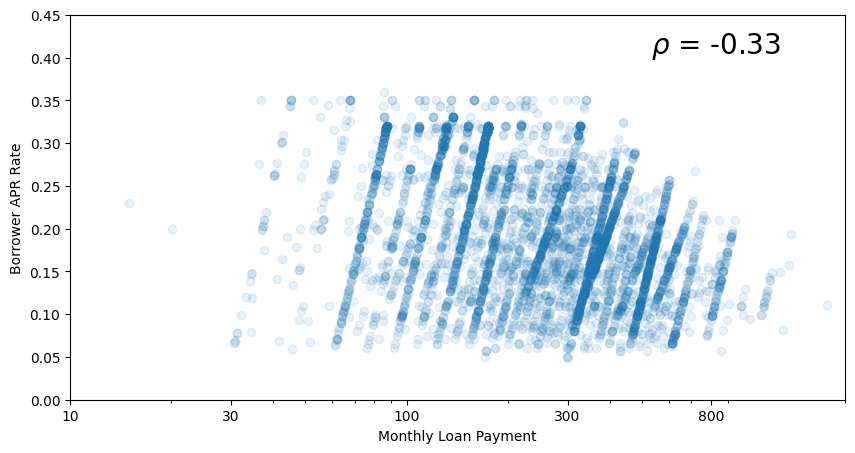

In [48]:
# Scatterplot 02
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='MonthlyLoanPayment', y='BorrowerRate', alpha = 1/10)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Borrower APR Rate')

plt.xscale('log')
plt.xticks([10, 30, 100, 300, 800], [10, 30, 100, 300, 800])
plt.xlim((0,2000))
plt.ylim((0,0.45))

# display the correlation
ax = plt.gca()
coef = loans_dirty[['MonthlyLoanPayment', 'BorrowerRate']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes);

### BorrowerRate vs CreditScoreRangeLower

**Question from the data:** Is BorrowerRate affected by Credit Score?

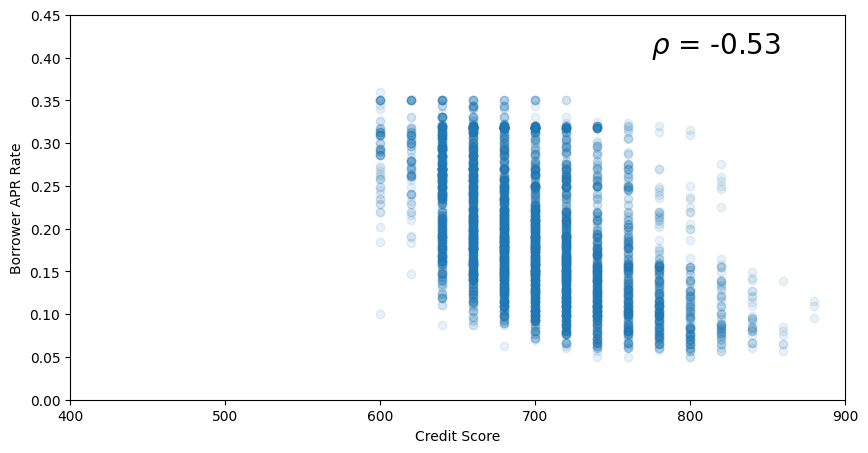

In [49]:
# Scatterplot 03
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='CreditScoreRangeLower', y='BorrowerRate', alpha = 1/10)
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR Rate')
plt.xlim((400, 900))
plt.ylim((0,0.45))

# display the correlation
ax = plt.gca()
coef = loans_dirty[['CreditScoreRangeLower', 'BorrowerRate']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes);

### BorrowerRate vs ProsperScore

**Question from the data:** Is BorrowerRate affected by ProsperScore?

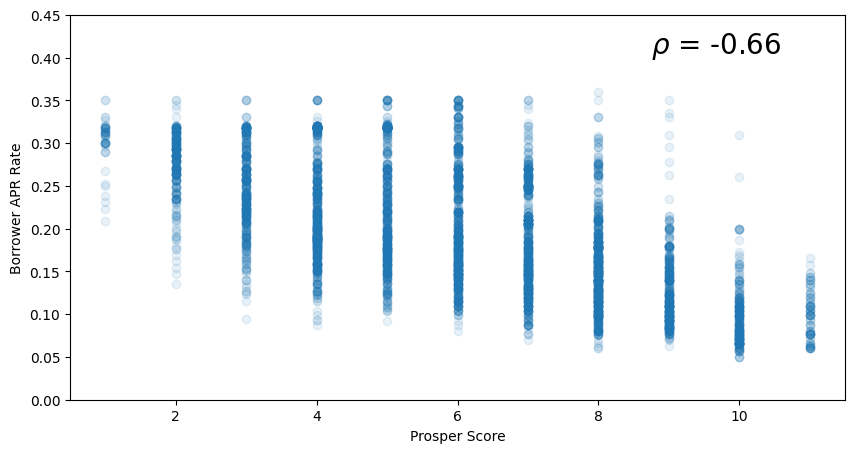

In [50]:
# Scatterplot 04
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='ProsperScore', y='BorrowerRate', alpha = 1/10)
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR Rate')
plt.ylim((0,0.45))

# display the correlation
ax = plt.gca()
coef = loans_dirty[['ProsperScore', 'BorrowerRate']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes);

The negative correlations of BorrowerRate and LoanOriginalAmount, CreditScoreRangeLower and ProsperScore are generally visible from the scatter plots and their relationships make sense.

- As the BorrowerRate increases, the LoanOriginalAmount decreases.
- As the BorrowerRate increases, the CreditScoreRangeLower decreases.
- As the BorrowerRate increases, the ProsperScore decreases.

The more unusual is the relationship between BorrowerRate and MonthlyLoanPayment
- As the BorrowerRate increases, generally the MonthlyLoanPayment increases, but not all the time - I suspect this is equally dependent on Credit Score and Term.

### LoanOriginalAmount vs MonthlyLoanPayment

**Question from the data:** Is Monthly Loan Payment amount affected by Loan Amount?

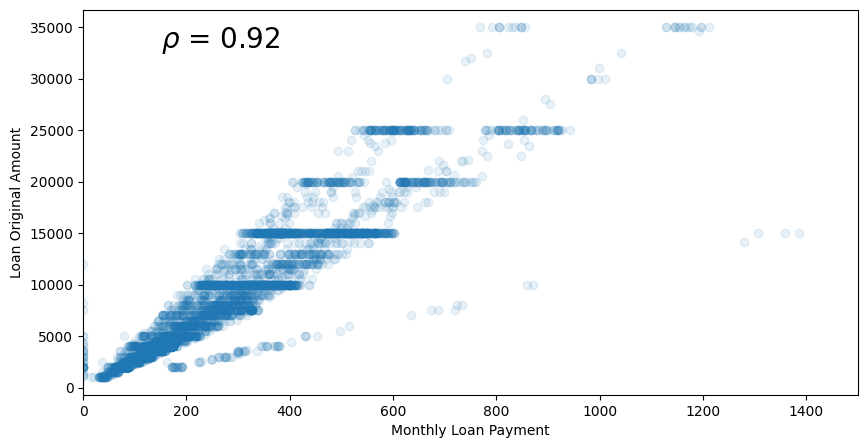

In [51]:
# Scatterplot 05
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='MonthlyLoanPayment', y='LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Loan Original Amount')
plt.xlim((0, 1500))

# display the correlation
ax = plt.gca()
coef = loans_dirty[['MonthlyLoanPayment', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.9), size = 20, xycoords = ax.transAxes);

### LoanOriginalAmount vs CreditScoreRangeLower

**Question from the data:** Does Credit Score affect Loan Amount?

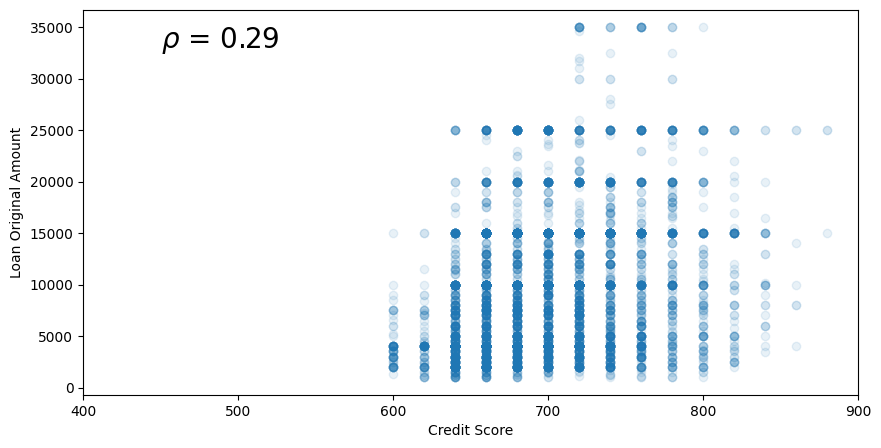

In [52]:
# Scatterplot 06
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='CreditScoreRangeLower', y='LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Credit Score')
plt.ylabel('Loan Original Amount')
plt.xlim((400, 900))

# display the correlation
ax = plt.gca()
coef = loans_dirty[['CreditScoreRangeLower', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.9), size = 20, xycoords = ax.transAxes);

### LoanOriginalAmount vs Term

**Question from the data:** Does Loan Amount affect Repayment Term?

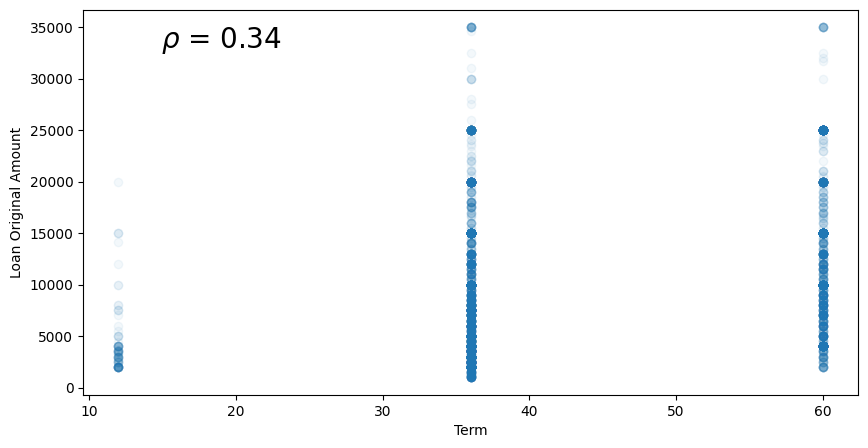

In [53]:
# Scatterplot 07
plt.figure(figsize=[10, 5])
plt.scatter(data=loans_samp, x='Term', y='LoanOriginalAmount', alpha = 1/20)
plt.xlabel('Term')
plt.ylabel('Loan Original Amount')

# display the correlation
ax = plt.gca()
coef = loans_dirty[['Term', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.9), size = 20, xycoords = ax.transAxes);

The positive correlation of original loan amount to monthly loan payment is obvious from the scatterplots.

The greater the value of the loan, the higher payment - regardless of the interest rate, since you'll have substantially more to payback in the same loan term.

The higher the loan amount, the higher the qualifying Credit Score needed to build trust with the Peer Lenders that you will indeed repay the loan.

Larger loan amounts unlock longer repayment terms.

## Categorical Variables

Quantitative data vs Qualitative data

In [54]:
# Sample size of 5000
samples = np.random.choice(loans_dirty.shape[0], 5000, replace = False)
loans_samp = loans_dirty.iloc[samples,:]

### Loan Status by Credit Score Range

**Question from the data:** What Credit Score range has the most defaults?

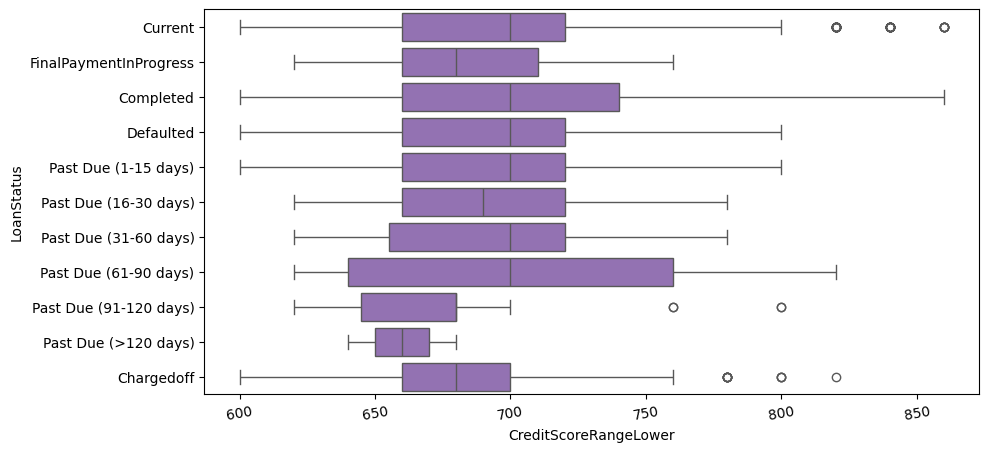

In [55]:
# Box Plots 01 - Loan Status vs Credit Score Range

# Order income range logically
status_order = [
    "Current", "FinalPaymentInProgress", "Completed", "Defaulted", "Past Due (1-15 days)", "Past Due (16-30 days)",
    "Past Due (31-60 days)", "Past Due (61-90 days)", "Past Due (91-120 days)", "Past Due (>120 days)", "Chargedoff"
]

plt.figure(figsize=[10, 5])
sns.boxplot(data=loans_samp, x='CreditScoreRangeLower', y='LoanStatus', order=status_order, color='tab:purple')
plt.xticks(rotation=10);

Credit Score is directly related to Loan Status. The higher the Credit Score, the more positive the outcome of the loan: Current, Completed or Final Payment in Progress. The Lower Credit Score ranges have a higher prevalence of the negative loan statuses: Charged Off, Defaulted, Past Due. This is expected behavior as to attain a higher credit score, you must be financially responsible and pay your debts on time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrower Rate is negatively correlated with the loan original amount, monthly loan payment and credit score range lower. Qualifying to borrow larger loan amounts means you are likely fiscally responsible, you'll receive a lower interest rate and you can afford higher monthly payments.

The positive correlation between original loan amount, monthly loan payment and credit score, validates their interconnectedness.

High-risk borrowers qualify for loans, if at all, for much lower amounts than medium or low risk borrowers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Higher income borrowers borrow higher amounts for lower rates
- Loans with a higher borrower interest rate default more frequently
- Longer repayment terms are reserved for Higher loan amounts

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [56]:
# Use a smaller sample size to prevent Overplotting

# Sample size of 1000

samples = np.random.choice(loans_dirty.shape[0], 1000, replace = False)
loans_samp = loans_dirty.iloc[samples,:]

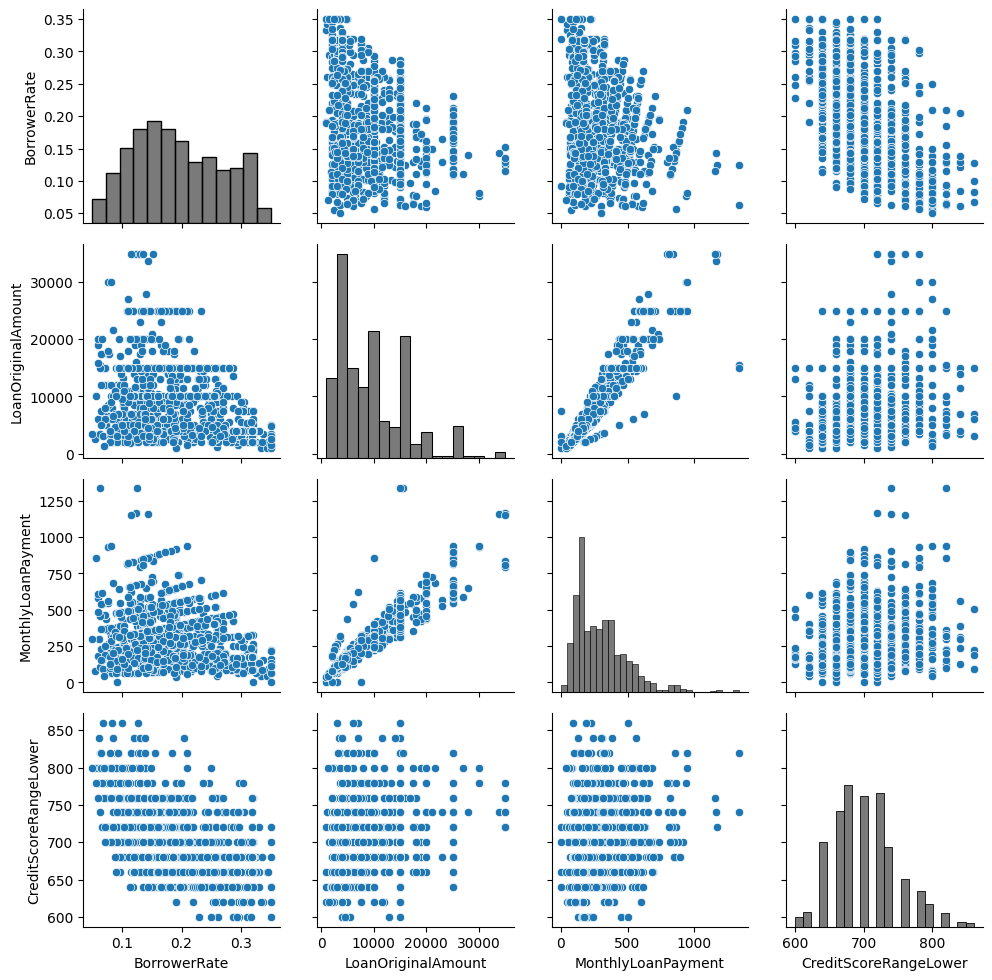

In [57]:
# Plot Matrix for overall Investigation of multiple Variables

stats = ['BorrowerRate', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower']
g = sns.PairGrid(data=loans_samp, vars=stats)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot, hue=None, color=".3");

**Reference:** seaborn.PairGrid (https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

**Question from the data:** How does loan Term length affect the BorrowerRate & CreditScore metrics?

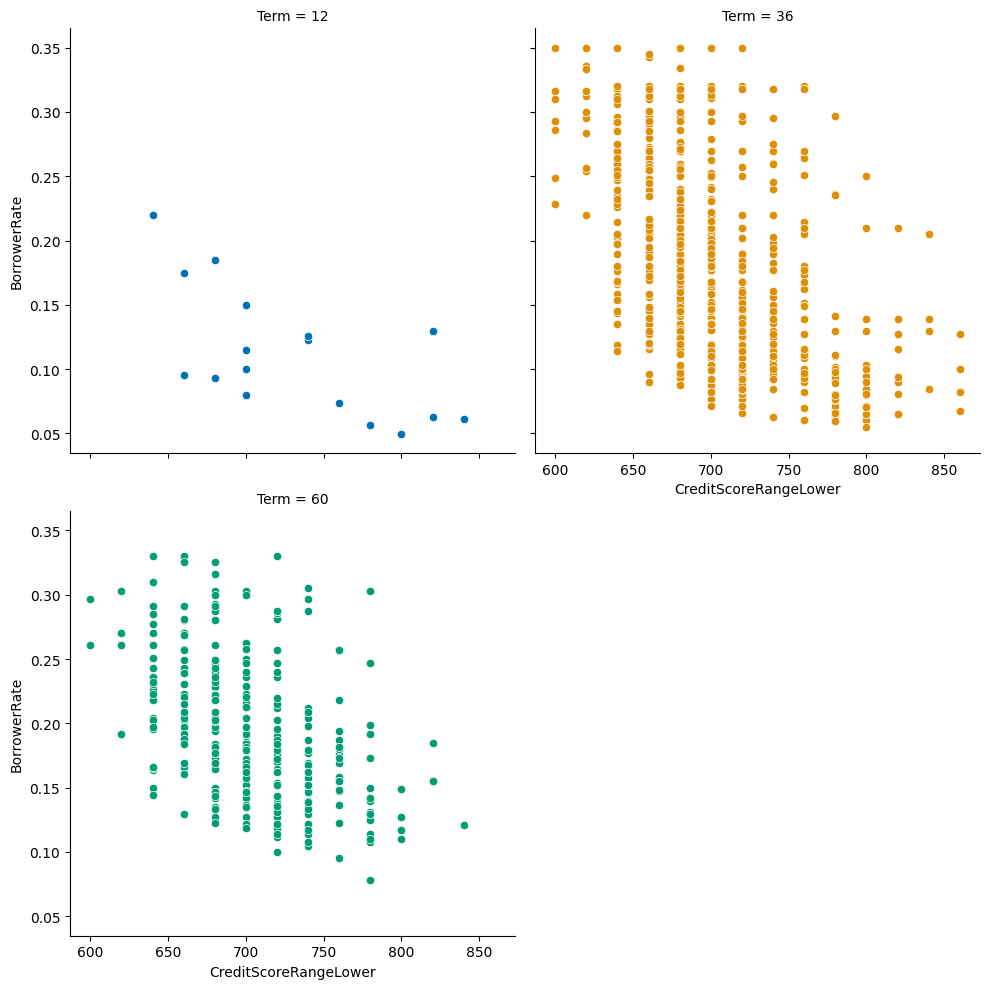

In [58]:
# Multivariable Facet Grid Plot: Col = Term, X = CreditScoreRangeLower, Y = BorrowerRate

g = sns.FacetGrid(data=loans_samp, col='Term', hue='Term', col_wrap=2, height=5, palette = 'colorblind')
g.map(sns.scatterplot, 'CreditScoreRangeLower', 'BorrowerRate');

36 and 60 month Loan terms are predominately available for those with higher Credit Scores. This would also match with the Bivariable exploration of Loan Term's positive relationship with Original Loan Amount.

**Reference:** seaborn.FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

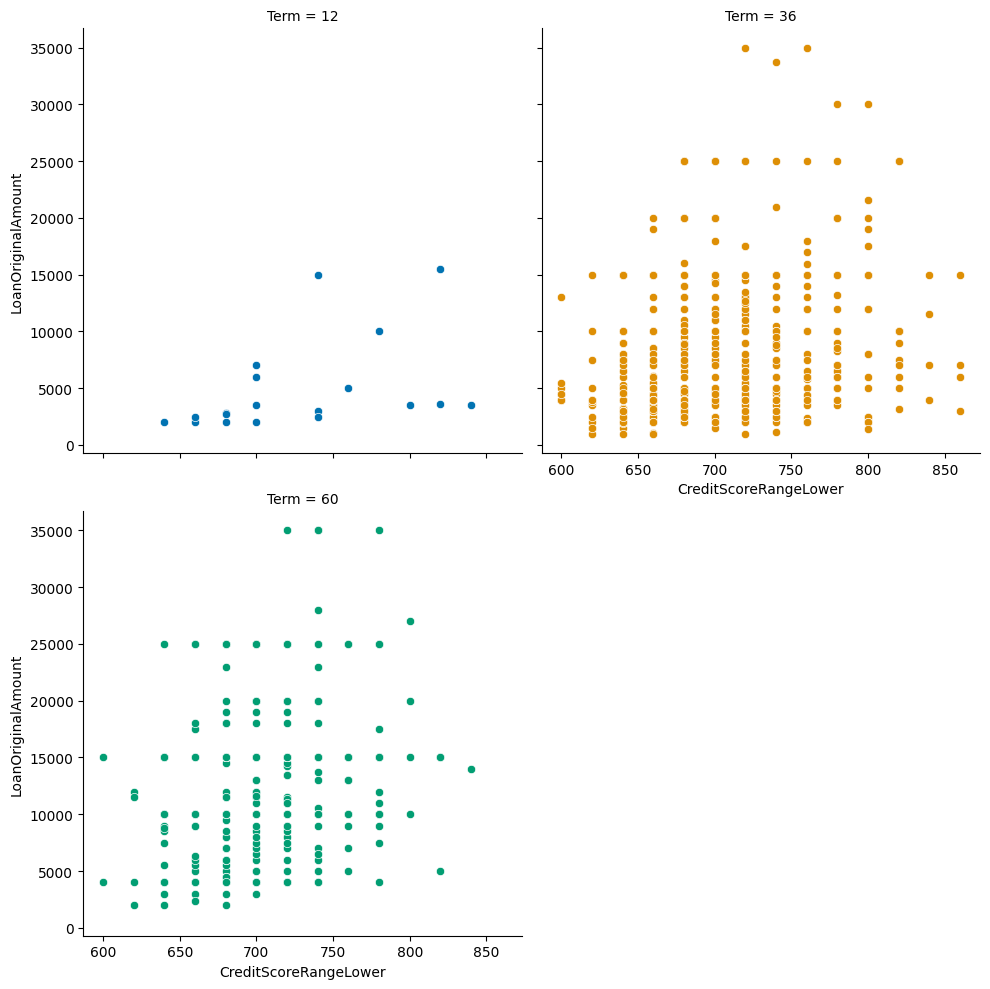

In [59]:
# Multivariable Facet Grid Plot: Col = Term, X = CreditScoreRangeLower, Y = LoanOriginalAmount

g = sns.FacetGrid(data=loans_samp, col='Term', hue='Term', col_wrap=2, height=5, palette = 'colorblind')
g.map(sns.scatterplot, 'CreditScoreRangeLower', 'LoanOriginalAmount');

In [60]:
# Multivariable Scatterplot: Monthly Loan Payment vs Loan Amount by Term

**Question from the data:** How does loan Term length affect the LoanOriginalAmount & MonthlyLoanPayment metrics?

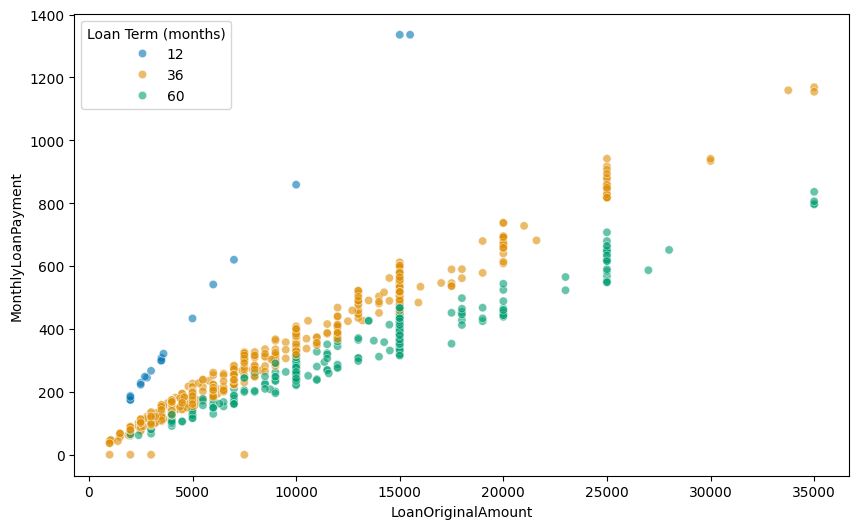

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=loans_samp, 
    x='LoanOriginalAmount', 
    y='MonthlyLoanPayment', 
    hue='Term', 
    palette='colorblind', 
    alpha=0.6
)
plt.legend(title='Loan Term (months)')
plt.show()

Shorter terms result in higher monthly payments for the same loan amount. This can affect affordability and default risk.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The majority of the loans had an original loan amount of either  4,000 𝑜𝑟
 15,000. Indeed after the Multivariable exploration, we see that the majority of the 12 month term $4000 loans went to customers with middle range Credit Scores. This warrants further reference with the Loan Category to determine if these are for unexpected emergencies or if these are part of the main category Debt consolidation.

36 month term loans are primarily up to $20K in value.

There is a very prominent negative correlation between Credit Score and BorrowerRate as expected. The higher your Credit Score, the lower your Interest Rate, and vice a versa.

There is an obvious positive correlation between Original Loan Amount and Credit Score, the higher your Score, the higher the amount of Loan Funds you can borrow and the longer the repayment term.

### Were there any interesting or surprising interactions between features?

That there was such a large amount of $15K loans funded - will have to further investigate if this is the max you can borrow before a harsher level of scrutiny and documentation is required.

## Conclusions

#### Summary Findings:

- Distribution of loan amount is multimodal
- majority of the loans had an original loan amount of either 4,000 𝑜𝑟 15,000
- 36 month term loans are most popular
- Debt Consolidation loan category is by far the most popular
- Positive correlation between Original Loan Amount and Credit Score
- Negative correlation between Credit Score and BorrowerRate
- 25% loans have a BorrowerRate at or above 25%, maxing out at 36%
- 50% of ProsperScores are between 4 to 8 on a scale of 1-10, 10 being the highest
- The most common monthly payment was $173/month
- 660-740 Credit Score range for the majority of the loans
- 15-40% Debt to Income Ratio for the majority of the loans 

### Create a Master Cleaned Dataset to use in part 2

In [62]:
loans_dirty.to_csv('prosperloans_clean_master.csv', index=False)